In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [36]:
stock_symbol = "AMD"
epoch_count = 10
data = pd.read_csv('csv/' + str(stock_symbol) + '.timeseries.csv', date_parser = True)
data.tail()

,date,open,high,low,close,volume,adjclose
10028,1980-03-21,0.0,3.020833,2.906250,2.916667,130800,2.916667
10029,1980-03-20,0.0,3.062500,3.010417,3.010417,159600,3.010417
10030,1980-03-19,0.0,3.083333,3.020833,3.041667,295200,3.041667
10031,1980-03-18,0.0,3.125000,2.937500,3.031250,727200,3.031250
10032,1980-03-17,0.0,3.302083,3.125000,3.145833,219600,3.145833


In [37]:
data_training = data[data['date'] < '2019-01-01'].sort_values(by='date', ascending=True).copy()
data_training

,date,open,high,low,close,volume,adjclose
10032,1980-03-17,0.000000,3.302083,3.125000,3.145833,219600,3.145833
10031,1980-03-18,0.000000,3.125000,2.937500,3.031250,727200,3.031250
10030,1980-03-19,0.000000,3.083333,3.020833,3.041667,295200,3.041667
10029,1980-03-20,0.000000,3.062500,3.010417,3.010417,159600,3.010417
10028,1980-03-21,0.000000,3.020833,2.906250,2.916667,130800,2.916667
10027,1980-03-24,0.000000,2.916667,2.635417,2.666667,436800,2.666667
10026,1980-03-25,0.000000,2.750000,2.552083,2.604167,645600,2.604167
10025,1980-03-26,0.000000,2.604167,2.427083,2.447917,466800,2.447917
10024,1980-03-27,0.000000,2.375000,2.239583,2.375000,1129200,2.375000
10023,1980-03-28,0.000000,2.583333,2.458333,2.541667,666000,2.541667


In [38]:
data_test = data[data['date'] >= '2019-01-01'].sort_values(by='date', ascending=True).copy()
data_test

,date,open,high,low,close,volume,adjclose
249,2019-01-02,18.010000,19.000000,17.980000,18.830000,87148700,18.830000
248,2019-01-03,18.420000,18.680000,16.940001,17.049999,117277600,17.049999
247,2019-01-04,17.549999,19.070000,17.430000,19.000000,111878600,19.000000
246,2019-01-07,19.440001,20.680000,19.000000,20.570000,107157000,20.570000
245,2019-01-08,21.190001,21.200001,19.680000,20.750000,121271000,20.750000
244,2019-01-09,20.889999,21.440001,20.070000,20.190001,163944100,20.190001
243,2019-01-10,19.760000,19.830000,18.900000,19.740000,115629400,19.740000
242,2019-01-11,19.469999,20.350000,19.190001,20.270000,85110800,20.270000
241,2019-01-14,19.959999,20.620001,19.750000,20.230000,71350200,20.230000
240,2019-01-15,20.440001,20.680000,20.260000,20.379999,62785800,20.379999


In [39]:
training_data = data_training.drop(['date', 'adjclose'], axis = 1)
training_data.head()

,open,high,low,close,volume
10032,0.0,3.302083,3.125000,3.145833,219600
10031,0.0,3.125000,2.937500,3.031250,727200
10030,0.0,3.083333,3.020833,3.041667,295200
10029,0.0,3.062500,3.010417,3.010417,159600
10028,0.0,3.020833,2.906250,2.916667,130800


In [40]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.        , 0.03443886, 0.03451811, 0.03325705, 0.00067557],
       [0.        , 0.03065584, 0.03024607, 0.03075959, 0.00223714],
       [0.        , 0.02976572, 0.03214475, 0.03098663, 0.00090814],
       ...,
       [0.37085107, 0.34287545, 0.33789019, 0.34590235, 0.34262459],
       [0.37297874, 0.35505233, 0.35383913, 0.35309502, 0.33598393],
       [0.3861702 , 0.35932493, 0.37001596, 0.36704444, 0.26066762]])

In [41]:
x_train = []
y_train = []

In [42]:
training_data.shape[0]

9783

In [43]:
for i in range(60, training_data.shape[0]):
    x_train.append(training_data[i-60:i])
    y_train.append(training_data[i, 0])

In [44]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [45]:
x_train.shape, y_train.shape

((9723, 60, 5), (9723,))

In [46]:
### Building LSTM

In [47]:
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout

In [48]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressior.add(Dropout(0.2))
               
regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [49]:
regressior.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 60, 60)            15840     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 60)            29040     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 60, 100)           72400     
__________

In [52]:
regressior.compile(optimizer='sgd', metrics=['mae', 'acc', 'mae'], loss = 'mean_squared_error')

In [59]:
regressior.fit(x_train, y_train, steps_per_epoch=10, epochs=epoch_count, batch_size=32)

ValueError: If steps_per_epoch is set, the `batch_size` must be None.

In [56]:
### Prepare test dataset

In [19]:
data_test.tail()

,date,open,high,low,close,volume,adjclose
4,2019-12-20,43.439999,44.259998,43.259998,44.150002,68104700,44.150002
3,2019-12-23,44.580002,45.630001,44.389999,45.459999,55886500,45.459999
2,2019-12-24,46.099998,46.610001,45.770000,46.540001,44432200,46.540001
1,2019-12-26,46.990002,47.310001,45.660000,46.630001,57562800,46.630001
0,2019-12-27,46.849998,46.880001,45.980000,46.180000,36581300,46.180000


In [20]:
data_training.tail(60)

,date,open,high,low,close,volume,adjclose
309,2018-10-04,27.990000,28.830000,27.370001,27.780001,95831200,27.780001
308,2018-10-05,28.070000,28.469999,26.930000,27.350000,88008500,27.350000
307,2018-10-08,26.730000,27.540001,25.959999,26.459999,103789500,26.459999
306,2018-10-09,26.150000,27.709999,26.000000,27.240000,105461800,27.240000
305,2018-10-10,27.379999,27.400000,24.910000,25.000000,147682900,25.000000
304,2018-10-11,24.740000,26.200001,24.549999,25.299999,147013800,25.299999
303,2018-10-12,26.770000,26.969999,25.670000,26.340000,111059400,26.340000
302,2018-10-15,26.379999,26.770000,25.750000,26.260000,70523500,26.260000
301,2018-10-16,26.629999,28.230000,26.170000,28.180000,92529000,28.180000
300,2018-10-17,28.410000,28.530001,26.920000,27.299999,89466900,27.299999


In [21]:
past_60_days = data_training.tail(60)

In [22]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['date', 'adjclose'], axis = 1)
df.head()

,open,high,low,close,volume
0,27.990000,28.830000,27.370001,27.780001,95831200
1,28.070000,28.469999,26.930000,27.350000,88008500
2,26.730000,27.540001,25.959999,26.459999,103789500
3,26.150000,27.709999,26.000000,27.240000,105461800
4,27.379999,27.400000,24.910000,25.000000,147682900


In [23]:
inputs = scaler.transform(df)
inputs

array([[0.59553191, 0.57979064, 0.58692187, 0.5701831 , 0.29481226],
       [0.59723404, 0.57209996, 0.57689679, 0.56081082, 0.27074673],
       [0.56872339, 0.55223245, 0.55479606, 0.54141236, 0.31929493],
       ...,
       [0.98085103, 0.95962402, 1.00615175, 0.97907587, 0.1366899 ],
       [0.99978727, 0.97457811, 1.00364547, 0.98103751, 0.17708449],
       [0.99680848, 0.96539203, 1.01093642, 0.9712293 , 0.11253762]])

In [24]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [25]:
x_test, y_test = np.array(x_test),np.array(y_test)
x_test.shape, y_test.shape

((250, 60, 5), (250,))

In [26]:
y_pred = regressior.predict(x_test)

C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not avai

In [27]:
my_scale = scaler.scale_
my_scale[0]

0.02127659574468085

In [28]:
scale = 1/my_scale[0]
scale

47.0

In [29]:
y_pred = y_pred*scale
y_test = y_test*scale

In [30]:
### Visualize Data 

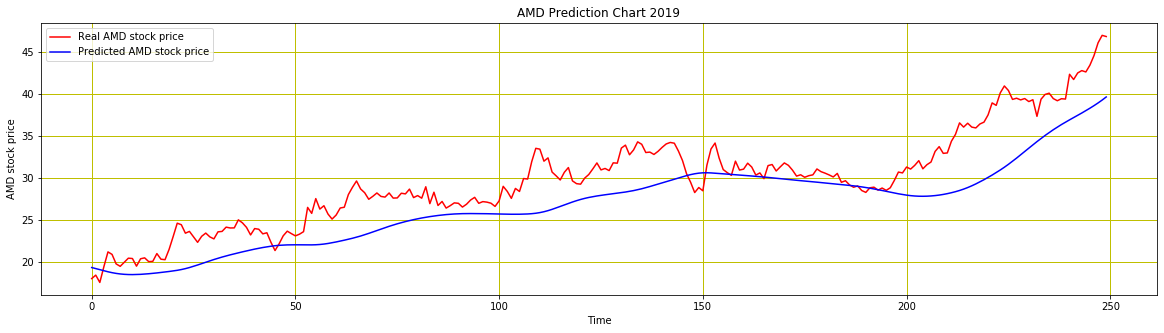

In [31]:
plt.figure(figsize=(20,5))
plt.plot(y_test, color = 'red', label = 'Real ' + stock_symbol + ' stock price')
plt.plot(y_pred, color = 'blue', label = 'Predicted ' + stock_symbol + ' stock price')
plt.title(stock_symbol + ' Prediction Chart 2019')
plt.grid(color='y', linestyle='-', linewidth=1)
plt.xlabel('Time')
plt.ylabel(stock_symbol + ' stock price')
plt.legend()
plt.show()